In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

## Notes to consider for the challenge

1. Pre-process the data is somewhat complete, though we may need to confirm between the group to check if this is the best representation of data.
 - We found the mean of each column from the data base (Concrete_Data_Yeh_final.csv) - but is this the right approach?
 - 

2. Lets check the correlation between each input variable and Compressive strength, having filled all NaN values. Use unscaled data, we just want to know what the current trend is.
- This might need to go back to step 1, but try to use another alternative for the NaN values - e.g. using mode, mean or could just remove the row as a whole?


3. 


In [2]:
filename = 'Concrete_Data_Yeh_final.csv'
variables = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

class PreProcessing:
    "The aim of this class is to successfully replace all the empty values from"
    "the file given, and to split the columns into their own series / arrays."
    def __init__(self, file):
        self.data = pd.read_csv(file)
        
    def checkNaN (self):
        return self.data.isnull().sum()
    
    def FillNaN (self) -> pd.DataFrame:
        # Here we used the .fillna method to replace the NaN values with the mean or median of the variable.
        # We checked this by plotting the graphs in the following code and using the DataFrame produced comparing mean and median and gradient (for a linear relationship).
        for i, variable in enumerate(self.data.columns[:-1]):
            if 1 < i < 5:
                self.data[variable].fillna(self.data[variable].median(), inplace = True)
            else:
                self.data[variable].fillna(self.data[variable].mean(), inplace = True)
        
        self.data['age'] = np.log(self.data['age'])
        return self.data
    
    def removeNaN (self) -> pd.DataFrame:
        # Here we used the .dropna method to remove the NaN values from the original dataset.
        self.data.dropna(inplace = True)
        return self.data


'''test = PreProcessing(filename).removeNaN()
test2 = PreProcessing(filename).FillNaN()'''
test = PreProcessing(filename).checkNaN()
print(test)
concretedata = PreProcessing(filename).FillNaN()
concretedata.head(20)

cement               0
slag                 6
flyash               1
water                8
superplasticizer    14
coarseaggregate      7
fineaggregate        3
age                  5
csMPa                0
dtype: int64


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.598422,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,3.816114,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5.886104,44.30
5,266.0,114.0,0.0,228.0,6.5,932.0,670.0,4.499810,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5.899897,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,3.332205,36.45
8,266.0,114.0,0.0,185.0,0.0,932.0,670.0,3.332205,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,3.332205,39.29


c:\Users\blueb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\blueb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\blueb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

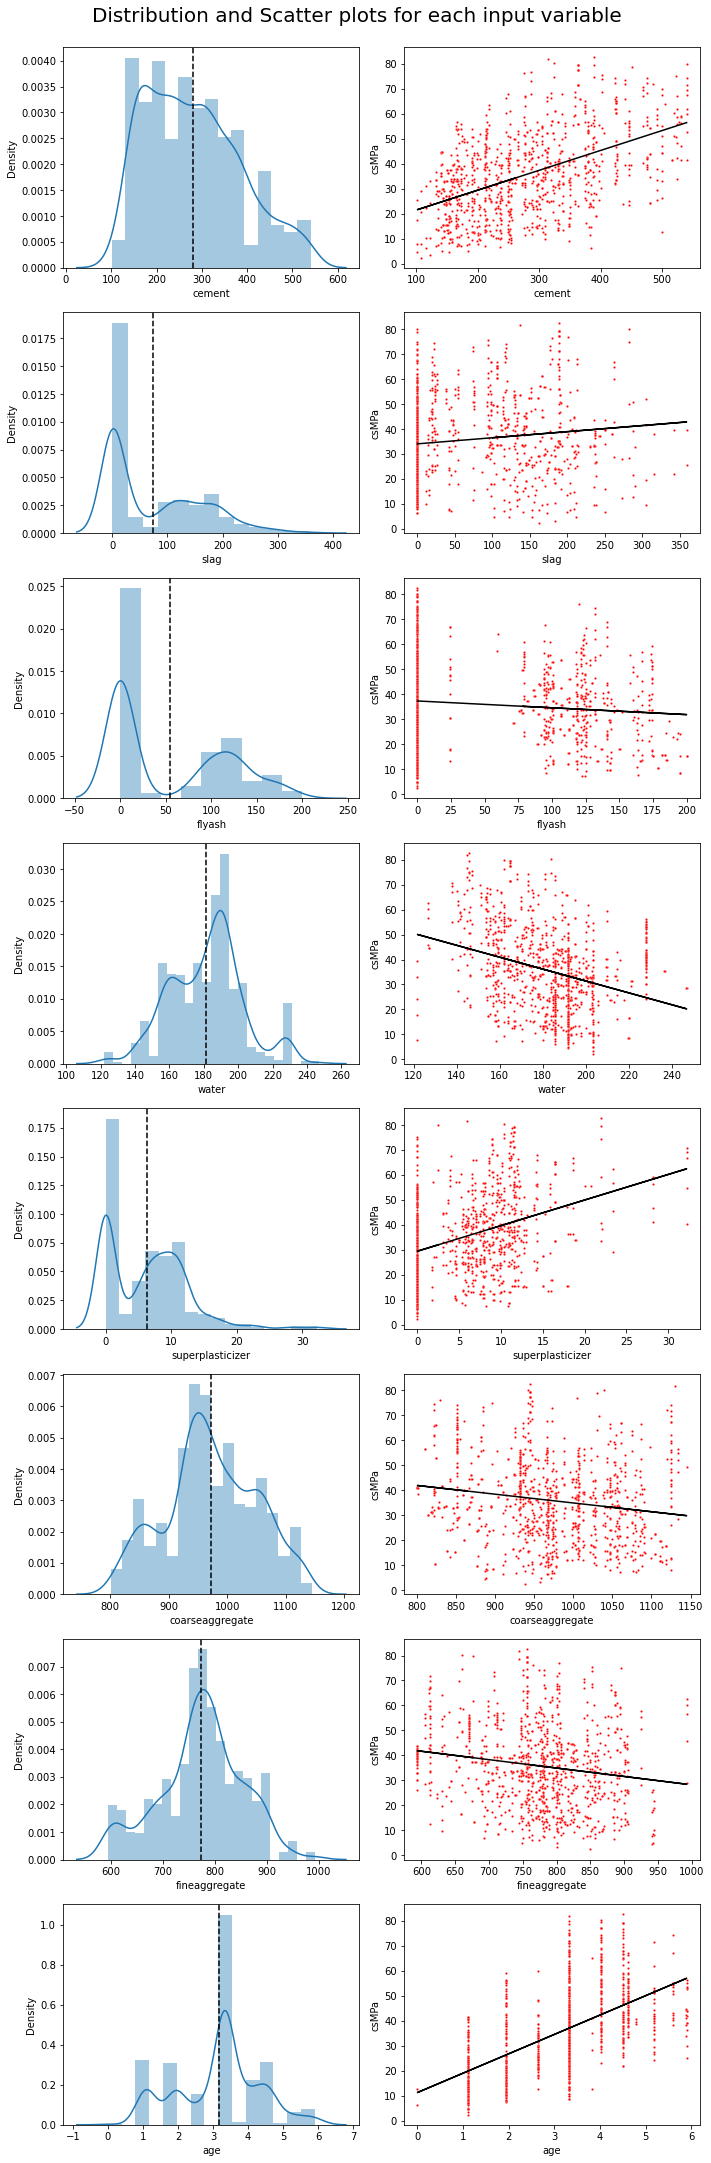

,Variables,Mean,Median,Gradient
0,cement,281.167864,272.900000,0.079580
1,slag,73.668652,22.000000,0.024389
2,flyash,54.070291,0.000000,-0.027302
3,water,181.533398,185.000000,-0.237909
4,superplasticizer,6.223689,6.500000,1.024238
5,coarseaggregate,972.653959,968.000000,-0.035132
6,fineaggregate,773.698150,779.300000,-0.033615
7,age,3.169721,3.332205,7.754549


In [3]:
fig, axs = plt.subplots(8, 2, figsize=(10, 30))
fig.suptitle('Distribution and Scatter plots for each input variable', y = 1, fontsize = 20)

dict = {'Variables': [], 'Mean': [], 'Median':[] , 'Gradient': []}

for i, input in enumerate(concretedata.columns[:-1]):
    dict['Variables'].append(input)

    sns.distplot(concretedata[input], ax=axs[i, 0])
    axs[i,0].axvline(concretedata[input].mean(),linestyle="dashed",label="mean", color='black')
    dict['Mean'].append(concretedata[input].mean())
    dict['Median'].append(concretedata[input].median())

    sns.scatterplot(x=concretedata[input], y=concretedata['csMPa'], ax=axs[i, 1], color = 'red', s = 5)
    m,b = np.polyfit(concretedata[input], concretedata['csMPa'], 1)
    axs[i,1].plot(concretedata[input], m*concretedata[input] + b, color='black')
    dict['Gradient'].append(m)

plt.tight_layout()
plt.show()
pd.DataFrame(dict)

### What does this information tell me?

1. Cement, water, coarseaggregate and fineaggregate generally follow a gaussian distribution. For pre-processing, it would be most appropriate to fill any NaN values with their respective mean for optimum regression performance.

2. Slag, flyash and superplasticizer have irregular gaussian patterns - this its mainly due to the amount of 0 values in their variable data, which it will likely lead to skewed data for regression. Using their respective scatter plots, it means that the true gradient isnt correct. 
But how are we going to deal with this?
- One idea I have in mind is to find an averaged value for csMPa for the variable data (slag, flyash and superplasticizer) that contain a 0 value. Yes this does mean slightly less data overall with respect to that variable, but will lead to higher and more precise regressions because the Gaussian will be more defined. **this has not been done yet!**

3. Age is slighlty more complex. Having spoken with Felix, he says that using a logarithmic scale in pre-processing would be the best approach. This can be backed up because looking at the graph of csMPa vs age, the gradient can not provide an accurate representation of the relationship between these two variables.

### Actions done:
1. Tried using mode - this further skews the data, since slag, flyash and superplasticiser have modes of 0.
2. Mean is quite appropriate, skewness still occurs with these 3 variables mentioned above.
3. Median does reduce the skewness slightly because there aren't that many NaN values to fill. We should not changed any existing in any way otherwise we can be introducing bias.

Final action taken - the mean and median were used for the following variables:
- Mean - cement, slag, coarseaggregate, fineaggregate and age
- Median - flyash, water and superplasticizer
- Age has been converted to a logarithmic scale.


### Training / Test data -> Scaling the Data
We will scale variables via MinMaxScaler (from sklearn.PreProcessing) here to understand and have easier comparison between variables, as they will be all under the same axis. It is better to scale such data before performing regression or any other machine learning algorithms that may follow. Statistical Data has been referenced as well to see how the numbers have adjusted.

In [4]:
# Create a scaler
scaler = MinMaxScaler()

# Split the DataFrame into training and testing sets - train_test_split is a function from sklearn.
X = concretedata.iloc[:,:-1].values 
y = concretedata['csMPa'].values

print(f'y:\n{y}\n')
print(f'X:\n{pd.DataFrame(X)}\n') # to check if the data is split correctly (X = 2D array, y = 1D array).
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y:
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]

X:
          0      1      2      3     4       5      6         7
0     540.0    0.0    0.0  162.0   2.5  1040.0  676.0  3.332205
1     540.0    0.0    0.0  162.0   2.5  1055.0  676.0  3.332205
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  5.598422
3     332.5  142.5    0.0  228.0   0.0   932.0  594.0  3.816114
4     198.6  132.4    0.0  192.0   0.0   978.4  825.5  5.886104
...     ...    ...    ...    ...   ...     ...    ...       ...
1025  276.4  116.0   90.3  179.6   8.9   870.1  768.3  3.332205
1026  322.2    0.0  115.6  196.0  10.4   817.9  813.4  3.332205
1027  148.5  139.4  108.6  192.7   6.1   892.4  780.0  3.332205
1028  159.1  186.7    0.0  175.6  11.3   989.6  788.9  3.332205
1029  260.9  100.5   78.3  200.6   8.6   864.5  761.5  3.332205

[1030 rows x 8 columns]



In [5]:
# To check if the general shape of both the training and testing sets are reasonable. This can be adjusted if bias is found. #
print(y_test.shape, y_train.shape, x_test.shape, x_train.shape)

(206,) (824,) (206, 8) (824, 8)


### Building the Regression Model
1. Will go through each type of regression technique (Linear, Ridge, Lasso and ElasticNet) via .fit() on the training data - this will determine which regression technique is best. To support the fit, .coef_ and .intercept are used as well on the training sets. The test set will undergo the .score() and .predict() functions to be applied on the training data.
 
To Note: The original x and y data (x and y) will be saved for future reference if they need to be used, e.g. plotting the graphs.


In [6]:
def RegressionModel (x_train, x_test, y_train, y_test, regression, metriclist, **kwargs):
    regressor = regression(**kwargs)
    regressor.fit(x_train, y_train.ravel())
    y_pred = regressor.predict(x_test) 
    # y_pred is a numpy array that gives a predicted value of y for each x in x_test, given the fit of the trained model.
    
    metrics = []
    for j in metriclist:
        # Append a tuple with the metric name and value to the list
        metrics.append(( j.__name__, j(y_test, y_pred)))

    print(pd.DataFrame(metrics, columns=['Metric', 'Value']))
    ref_x = np.linspace(0, 80, 1000)
    ref_y = ref_x
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='red', s=5)
    plt.title(f'Using {regression.__name__}, Score: {regressor.score(x_test, y_test)}')
    plt.plot(ref_x, ref_y, color='black', linestyle = 'dashed')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    return

#RegressionModel(CDtestscale, CDtrainscale, Ridge, metrics)
metrics = [lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), mean_squared_error, r2_score, mean_absolute_error, explained_variance_score]

Regression:LinearRegression
                     Metric      Value
0                  <lambda>   6.570676
1        mean_squared_error  43.173784
2                  r2_score   0.832450
3       mean_absolute_error   5.271974
4  explained_variance_score   0.833846


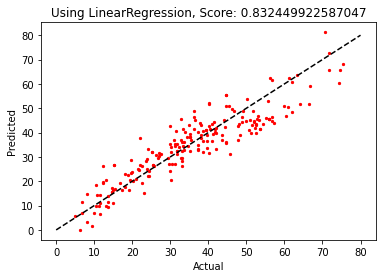

Regression:Ridge
                     Metric      Value
0                  <lambda>   6.570707
1        mean_squared_error  43.174195
2                  r2_score   0.832448
3       mean_absolute_error   5.271952
4  explained_variance_score   0.833844


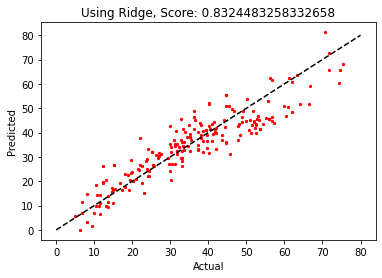

Regression:Lasso
                     Metric      Value
0                  <lambda>   6.573803
1        mean_squared_error  43.214887
2                  r2_score   0.832290
3       mean_absolute_error   5.270244
4  explained_variance_score   0.833683


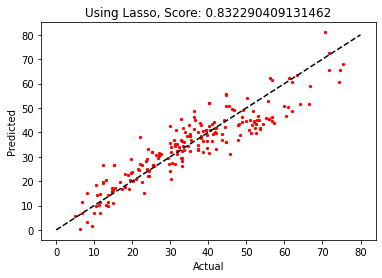

Regression:ElasticNet
                     Metric      Value
0                  <lambda>   6.597168
1        mean_squared_error  43.522620
2                  r2_score   0.831096
3       mean_absolute_error   5.280213
4  explained_variance_score   0.832494


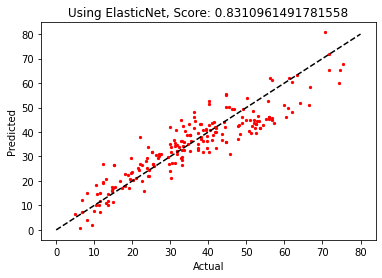

Regression:RandomForestRegressor
                     Metric      Value
0                  <lambda>   5.690664
1        mean_squared_error  32.383661
2                  r2_score   0.874325
3       mean_absolute_error   3.897912
4  explained_variance_score   0.876352


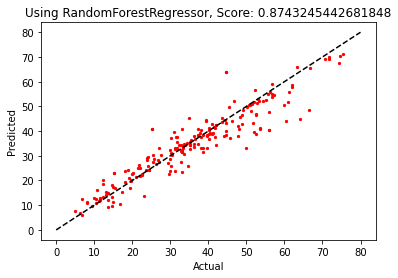

In [7]:
regressors = [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor]

for i, r in enumerate(regressors):
    print(f'Regression:{r.__name__}')
    if i == 0:
        RegressionModel(x_train, x_test, y_train, y_test, r, metrics)
    elif 1 <= i <= 3:
        RegressionModel(x_train, x_test, y_train, y_test, r, metrics, alpha = 0.1, random_state = 42)
    else:
        RegressionModel(x_train, x_test, y_train, y_test, r, metrics, n_estimators = 100, max_depth = 20, random_state = 42)

In [ ]:
'''Using just Random Forest - only operate if needed'''
for i in [50,100,150,200]:
    for j in [10,20,30,40,50]:
        print(f'n_estimators = {i}, max_depth = {j}')
        RegressionModel(x_train, x_test, y_train, y_test, RandomForestRegressor, metrics, n_estimators = i, max_depth = j, random_state = 42)
'''Best hyperparameters: n_estimators = 100, max_depth = 20'''

## Observations from this Model
To start, this code works well with all regression models, after having to modify the code quite a bit. Random Forest outperformed all other regression models, using hyperparameters of n_estimators and max_depth. You can check the performance data above each graph to check for yourself.
After realising this, I made a loop (the code above this cell) to find the combination of estimators/ depth that provided the best regression, which resulted in n_estimators = 100 and max_depth = 20.

I took out age from the training set to see the changes, and it reduced the scores of each regression by nearly half - this is likely the feature that is most important to obtain a good prediction.

### Whats next?
Try playing around with the Pre-processing stuff, I made a bunch of comments there that justified my decisions with variables using the mean or median. Some variables may also require to perform a log, but please check everything out if this is ok!

According to this website I found, the code that Ive done is within the 'Good' range. A score over 90% would be much better as this would lead to a more accurate prediction for the challenge overall.
Link: https://stephenallwright.com/good-accuracy-score/#:~:text=There%20is%20a%20general%20rule%20when%20it%20comes,and%2070%25%20-%20OK%20Below%2060%25%20-%20Poor

Let me know of any changes or anything you have in mind.

Hope this code is good enough for you guys <3
Mervyn